# WEDAP Figures

---
**WEDAP** : **W**eighted **E**nsemble **D**ata **A**nalysis and **P**lotting (pronounced we-dap)
<p>
    <img src="wedap_logo2.png" alt="wedap logo" width="200" align="left">
</p>

This notebook is a more bare-bones (less explanations) example of how the figures for the `WEDAP` paper were created. More details about the plots can be found in the actual paper. 

For general examples and explanations, see the [wedap demo jupyter notebook](https://github.com/darianyang/wedap/blob/main/docs/notebook/wedap_demo.ipynb). Note there is some similarity with the examples in the demo notebook and some of the examples in this notebook.

The format of the notebook will be to demonstrate creating each plot separately using the CLI (if available) and the Python API. All examples assume you're running them in the `paper_figures/` directory.

CLI commands are denoted in markdown as follows:
```
$ wedap --help
```

Python API scripting is done directly within the cells of the Jupyter notebook.

#### The main `WEDAP` plotting arguments:

Available `--data-type` || `data_type` options:
* `evolution` -- plot the evolution of a 1D pcoord over each WE iteration.
* `average` -- plot 1D or 2D+ using a range of WE iterations.
* `instant` -- plot 1D or 2D+ using a single WE iteration.

Available `--plot-mode` || `plot_mode` options:
* `line` -- plot 1D lines.
* `hist` -- plot histogram (default).
* `hist_l` -- plot histogram and contour lines.
* `contour` -- plot contour levels and lines.
* `contour_f` -- plot contour levels only.
* `contour_l` -- plot contour lines only.
* `scatter3d` -- plot 3 datasets in a scatter plot.
* `hexbin3d` -- plot 3 datasets in a hexbin plot.

In [1]:
import wedap
import matplotlib.pyplot as plt

In [2]:
# optionally apply default wedap matplotlib style sheet
plt.style.use("default.mplstyle")

### Example 1: Evolution Plot

This is a classic plot of the evolution of a WE simulation, plotting the probability distribution on the X axis as you progress through each iteration of the WE simulation on the Y axis. The colorbar is showing the probability values of each bin in the histogram. The probability values are derived from the raw data count values of the multiple segments in each WE iteration in the west.h5 file, weighted by each segment weight. This weighted histogram is normalized and shown on an inverted natural log scale: $-\ln(\frac{P(x)}{P(max)})$

```
$ wedap -W west.h5 --data-type evolution --xlabel "Heavy Atom RMSD ($\AA$)"
```

Evolution:   0%|          | 0/200 [00:00<?, ?it/s]

Text(4.875000000000002, 0.5, 'WE Iteration')

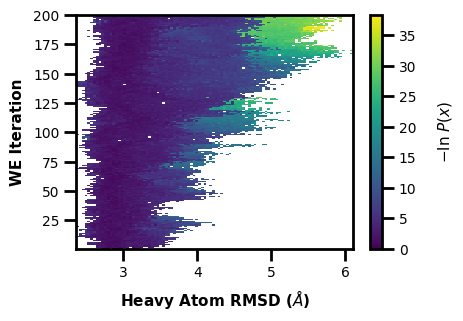

In [3]:
wedap.H5_Plot(h5="west.h5", data_type="evolution").plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("WE Iteration")

### Example 2: 1D Probability Distribution

You can also make simple 1D plots for a single iteration `--data-type instant` || `data_type='instant'` or for the average of a range of iterations `--data-type average` || `data_type='average'`. Here we show the average probability distribution for the entire range of WE iterations in the input `west.h5` file.

```
$ wedap -W west.h5 -dt average --plot-mode line --xlabel "Heavy Atom RMSD ($\AA$)"
```

Average 1D:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, -6.000000000000005, 'Heavy Atom RMSD ($\\AA$)')

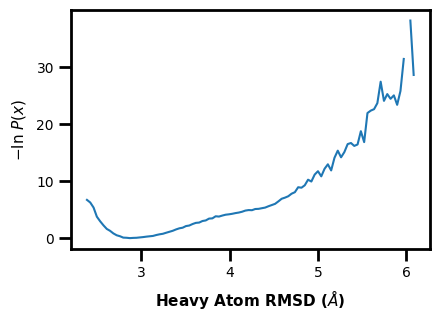

In [4]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="line").plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")

#### We can make advanced plots using this 1D framework:
Here we plot multiple datasets on one plot and also include the data from standard MD.

We can also directly compare multiple aux or pcoord datasets on a single axis.

If we wanted to, mdap could then be used to compare standard MD data to WE data.

In [47]:
# change style back to wedap default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("default.mplstyle")

Average 1D:   0%|          | 0/200 [00:00<?, ?it/s]

Average 1D:   0%|          | 0/200 [00:00<?, ?it/s]

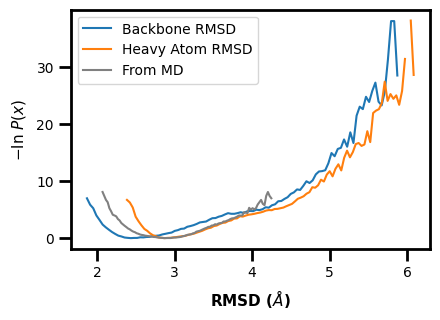

In [73]:
import mdap

fig, ax = plt.subplots()

for i, j in zip(["RMS_Backbone", "RMS_Heavy"],["Backbone RMSD", "Heavy Atom RMSD"]):
    wedap.H5_Plot(h5="west.h5", data_type="average", ax=ax, plot_mode="line",
                  Xname=i, data_label=j).plot()

# extra line needed to also plot the standard MD distribution data
mdap.MD_Plot(Xname="rms_heavy_nmr.dat", data_type="pdist", plot_mode="line",  
             data_label="From MD", ax=ax, color="gray").plot()

ax.set_xlabel("RMSD ($\AA$)")
plt.legend()
plt.show()

But keep in mind that this example doesn't make too much sense because the datasets between standard MD and WE are for different systems and metrics. Ideally, you could use this framework to compare the same calculation for the same system to see how (hopefully) the WE simulation was able to explore the landscape better than standard MD.

In [23]:
# save the resulting figure
fig.tight_layout()
fig.savefig("e2.png")

### Example 3: 2D Probability Distribution

We can also make probability distributions using two datasets, first we can try this with just our two dimensional progress coordinates. Note that you can set the progress coordinate or any aux dataset index using `Xindex`, `Yindex`, and `Zindex`. This can be useful for multi-dimensional progress coordinates, but also for multi-dimensional auxiliary data.

```
$ wedap -W west.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average -y RoG --ylabel "Radius of Gyration ($\AA$)"
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.3750000000000018, 0.5, 'Radius of Gyration ($\\AA$)')

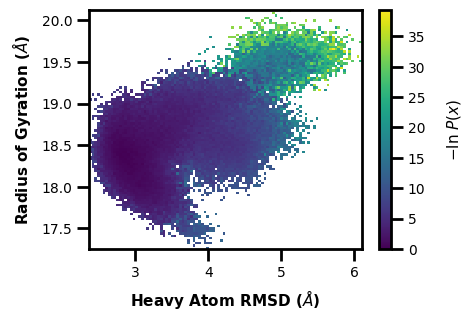

In [5]:
wedap.H5_Plot(h5="west.h5", data_type="average", Xindex=0, Yname="RoG", Yindex=0).plot()
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Radius of Gyration ($\AA$)")

### Example 4: 3D Scatter Plot

What if you don't want to show the probability axis? Well, you can also just show how three different datasets are related in a 3D scatter plot. Here we can put two different aux datasets on the X and Y axes and we can set the colorbar to show the progress coordinate values in comparison:

```
$ wedap -W west.h5 --xlabel "Radius of Gyration ($\AA$)" -x RoG  -dt average  -y Total_SASA --ylabel "SASA ($\AA^2$)" -z pcoord --cbar-label "Heavy Atom RMSD ($\AA$)" -pm scatter3d --scatter-interval 10 --scatter-size 1
```

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

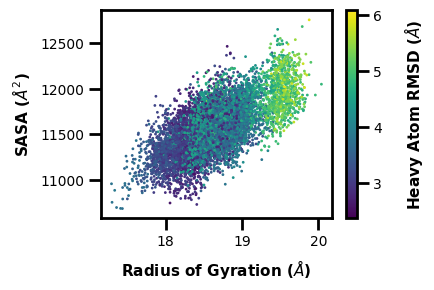

In [6]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="scatter3d", 
              Xname="RoG", Yname="Total_SASA", Zname="pcoord",
              cbar_label="Heavy Atom RMSD ($\AA$)", scatter_interval=10, scatter_size=1,
              xlabel="Radius of Gyration ($\AA$)", ylabel="SASA ($\AA^2$)").plot()

### Example 5: 3D Hexbin Plot

We can make a similar 3D plot using hexbins.

```
$ wedap -W west.h5 --xlabel "Radius of Gyration ($\AA$)" -x RoG  -dt average  -y Total_SASA --ylabel "SASA ($\AA^2$)" -z pcoord --cbar-label "Heavy Atom RMSD ($\AA$)" -pm hexbin3d --hexbin-grid 25
```

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

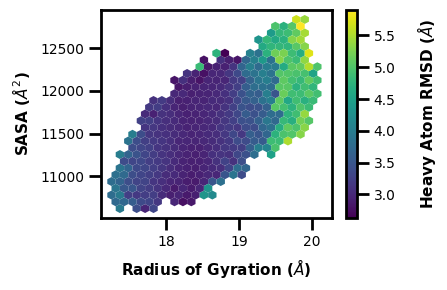

In [7]:
wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="hexbin3d", 
              Xname="RoG", Yname="Total_SASA", Zname="pcoord",
              cbar_label="Heavy Atom RMSD ($\AA$)", hexbin_grid=25,
              xlabel="Radius of Gyration ($\AA$)", ylabel="SASA ($\AA^2$)").plot()

### Example 6: 2D Hist with contour lines

```
$ wedap -h5 west.h5 -dt average -pm hist_l -X pcoord -Y RoG --xlabel "Heavy Atom RMSD ($\AA$)" --ylabel "Radius of Gyration ($\AA$)" --contour-interval 1 --pmax 20 -pu kcal --cmap afmhot_r --color k -lw 0.4 -sl 1 -hrx 2 6.5 -hry 17 20.5
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

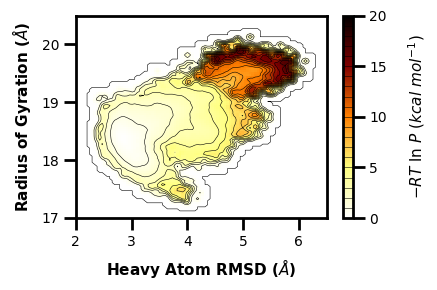

In [32]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "hist_l",
                "color" : "k",
                "Xname" : "pcoord", 
                "Yname" : "RoG", 
                "p_units" : "kcal",
                "cmap" : "afmhot_r",
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "p_max" : 20,
                "contour_interval" : 1,
                "linewidth" : 0.4,
                "smoothing_level" : 1,
                "histrange_x" : (2, 6.5),
                "histrange_y" : (17, 20.5),
                }
wedap.H5_Plot(**plot_options).plot()
plt.tight_layout()
plt.show()

We can also use the histogram from WE and grab the contour lines overlaid from standard MD:

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

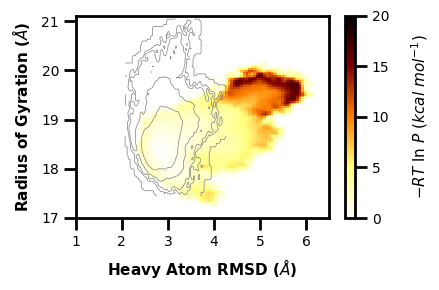

In [72]:
import mdap

fig, ax = plt.subplots()

# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "hist",
                "color" : "k",
                "Xname" : "RMS_Heavy", 
                "Yname" : "RoG", 
                "p_units" : "kcal",
                "cmap" : "afmhot_r",
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "p_max" : 20,
                "contour_interval" : 1,
                "linewidth" : 0.4,
                "smoothing_level" : 1,
                "histrange_x" : (1, 6.5),
                "histrange_y" : (17, 20.5),
                "ax" : ax,
                }
wedap.H5_Plot(**plot_options).plot()

mdap.MD_Plot(Xname="rms_heavy_nmr.dat", Yname="RoG.dat", ax=ax, plot_mode="contour_l", #p_max=3, p_units="kT",
             data_type="pdist", color="gray", linewidth=0.5, smoothing_level=1, contour_interval=1.5).plot(cbar=False)

plt.tight_layout()
plt.show()

### Example 7: 3D Contour Plot

```
$ wedap -h5 west.h5 -dt average -pm contour -X pcoord -Y RoG --xlabel "Heavy Atom RMSD ($\AA$)" --ylabel "Radius of Gyration ($\AA$)" --contour-interval 0.2 --zlabel "-RT ln(P) (kcal/mol)" --p-units kcal -3d --style None
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

/Users/darian/github/wedap/wedap/h5_plot.py:267: UserWarning: With 'contour' plot_type, p_max should be set. Otherwise max Z is used.
  warn("With 'contour' plot_type, p_max should be set. Otherwise max Z is used.")


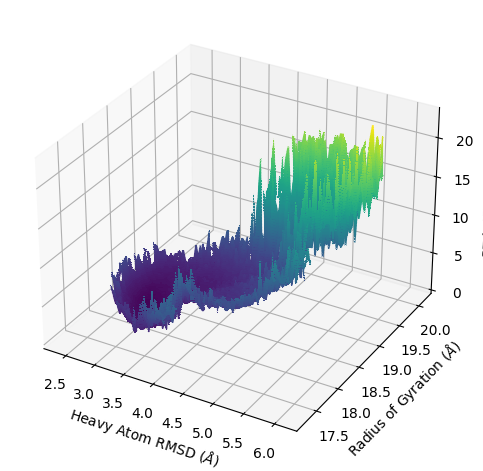

In [12]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "contour", 
                "Xname" : "pcoord", 
                "Yname" : "RoG", 
                "zlabel" : "-RT ln(P) (kcal/mol)",
                "p_units" : "kcal",
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "contour_interval" : 0.2,
                "proj3d" : True,
                }
# default None mpl style
plt.style.use('default')
wedap.H5_Plot(**plot_options).plot()
plt.tight_layout()
plt.show()

### Example 8: Joint Plot with Multiple Extra Features

Here, I want to demonstrate some of the additional features available by making a more complicated joint plot. This is using a contour plot instead of a histogram, as set by `--plot-mode contour` || `plot_mode='contour'`, there is also custom colormapping (`--cmap`), probability units (`--p-units`), iteration ranges (`--first-iter`, `--last-iter`), probability limits (`--pmin`, `--pmax`), plot style (`--style`), data smoothing (`--smoothing-level`), and plot limits (`--xlim`, `--ylim`).

```
$ wedap -W west.h5 -dt average -pm contour_f -x pcoord -y RoG --xlabel "Heavy Atom RMSD ($\AA$)" --ylabel "Radius of Gyration ($\AA$)" --joint-plot -pm contour_f --cmap gnuplot_r --style ggplot --p-units kcal --first-iter 3 --last-iter 200 --pmin 0.5 --pmax 17.5 --smoothing-level 1 --xlim 2 6.5 --ylim 17 20.5
```

Average 2D:   0%|          | 0/198 [00:00<?, ?it/s]

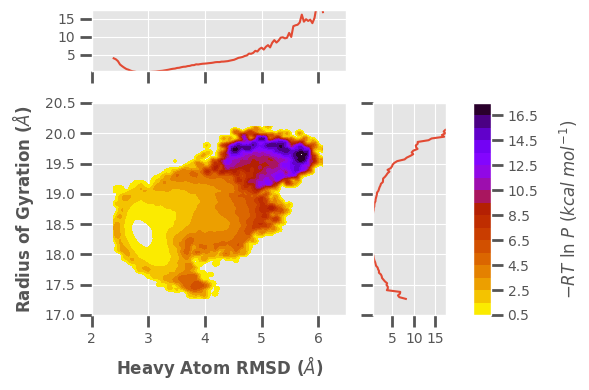

In [34]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "contour_f", 
                "Xname" : "pcoord", 
                "Yname" : "RoG", 
                "cmap" : "gnuplot_r",
                "jointplot" : True, 
                "p_units" : "kcal",
                "first_iter" : 3, 
                "last_iter" : 200, 
                "p_min" : 0.5, 
                "p_max" : 17.5,
                "smoothing_level" :1,
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "xlim" : (2, 6.5),
                "ylim" : (17, 20.5),
                "style" : "ggplot",
                }
# set style
plt.style.use("ggplot")
# change size since joint plots take more space
plt.rcParams["figure.figsize"] = (6,4)
wedap.H5_Plot(**plot_options).plot()

# save the resulting figure
plt.tight_layout()
plt.savefig("e6.png", transparent=False)

In [11]:
# change style back to wedap default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("default.mplstyle")

### Example 9: 4D Scatter Plot

```
$ wedap -h5 west.h5 -dt average -pm scatter3d -X Total_SASA -Y RoG -Z pcoord -C Num_Inter_NC --cmap gnuplot_r --p-units kcal --xlabel "SASA ($\AA^2$)" --ylabel "Radius of Gyration ($\AA$)" --zlabel "Heavy Atom RMSD ($\AA$)" --cbar-label "Number of Native Contacts" -4d --style None
```

Data 4D:   0%|          | 0/200 [00:00<?, ?it/s]

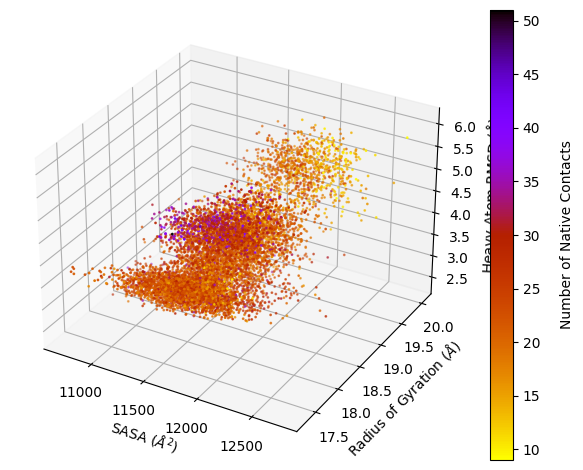

In [13]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "west.h5",
                "data_type" : "average", 
                "plot_mode" : "scatter3d",
                "Xname" : "Total_SASA",
                "Yname" : "RoG",
                "Zname" : "pcoord", 
                "Cname" : "Num_Inter_NC",
                "cmap" : "gnuplot_r",
                "p_units" : "kcal",
                "xlabel" : "SASA ($\AA^2$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "zlabel" : "Heavy Atom RMSD ($\AA$)",
                "cbar_label" : "Number of Native Contacts",
                "proj4d" : True,
                }
wedap.H5_Plot(**plot_options).plot()
plt.tight_layout()
plt.show()

### Example 10: Tracing Trajectories

We often want to see how a single continuous trajectory evolves as the WE simulation progresses. 

If we want to trace the path to get to iteration 200 and segment 1:

```
$ wedap -W west.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average -y RoG --ylabel "Radius of Gyration ($\AA$)" --trace-seg 200 20
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

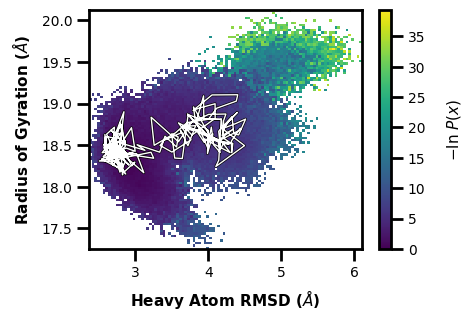

In [5]:
wedap_obj = wedap.H5_Plot(h5="west.h5", data_type="average", Xindex=0, Yname="RoG")
wedap_obj.plot()
wedap_obj.plot_trace((200,20), ax=wedap_obj.ax)
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Radius of Gyration ($\AA$)")
plt.show()

In [53]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("trace-seg.pdf")

Or we can trace by values, let's say we want to find a walker that goes to a pcoord value of 5.5 and an aux value of 19.5:

```
$ wedap -W west.h5 --xlabel "Heavy Atom RMSD ($\AA$)" -dt average -y RoG --ylabel "Radius of Gyration ($\AA$)" --trace-val 5.5 19.5
```

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

Trace Search:   0%|          | 0/200 [00:00<?, ?it/s]

Tracing ITERATION: 195, SEGMENT: 46


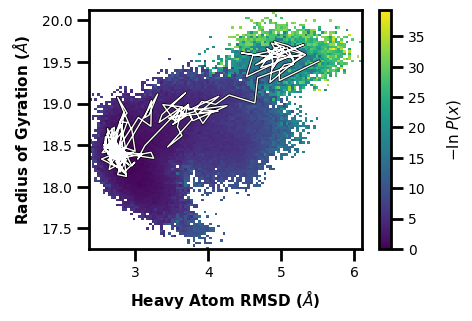

In [3]:
wedap_obj = wedap.H5_Plot(h5="west.h5", data_type="average", Xindex=0, Yname="RoG")
wedap_obj.plot()
wedap_obj.plot_trace((5.5, 19.5), ax=wedap_obj.ax, find_iter_seg=True)
plt.xlabel("Heavy Atom RMSD ($\AA$)")
plt.ylabel("Radius of Gyration ($\AA$)")
plt.show()

We also get an output line of which iteration and segment the trace corresponds to.

In [57]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("trace-val.pdf")

Next, a hexbin plot with multiple traces on top (inspired by Lorenzo Casalino).

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

Trace Search:   0%|          | 0/200 [00:00<?, ?it/s]

Tracing ITERATION: 200, SEGMENT: 58


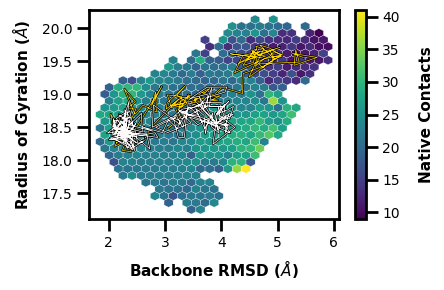

In [4]:
wedap_obj = wedap.H5_Plot(h5="west.h5", data_type="average", plot_mode="hexbin3d", 
                          Xname="RMS_Backbone", Yname="RoG", Zname="Num_Inter_NC",
                          xlabel="Backbone RMSD ($\AA$)", hexbin_grid=25, color="white", linewidth=0.2,
                          ylabel="Radius of Gyration ($\AA$)", cbar_label="Native Contacts")
wedap_obj.plot()

wedap_obj.plot_trace((5.5, 19.5), ax=wedap_obj.ax, color="gold", linewidth=0.5, find_iter_seg=True)
wedap_obj.plot_trace((200, 20), ax=wedap_obj.ax, color="snow", linewidth=0.5)

plt.show()

In [5]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("e10.png")

### Example 11: Data Extraction for Machine Learning with scikit-learn

In this example, I will go through how to extract data from a `west.h5` file using `wedap` and then we can directly pass the data to other Python libraries such as `scikit-learn` to do some clustering and pca.

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

Getting Data Array:   0%|          | 0/200 [00:00<?, ?it/s]

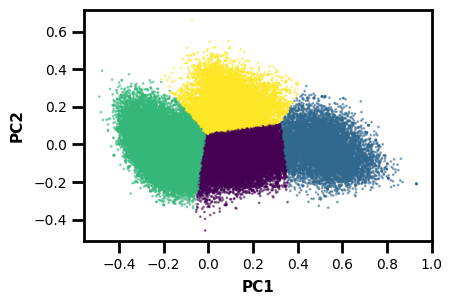

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# load h5 file into pdist class
data = wedap.H5_Pdist("west.h5", data_type="average")

# extract weights
weights = data.get_all_weights()

# extract data arrays (can be pcoord or any aux data name)
X = data.get_total_data_array("pcoord", 0)
Y = data.get_total_data_array("RoG", 0)
Z = data.get_total_data_array("Total_SASA", 0)
A = data.get_total_data_array("Num_Inter_NC", 0)

# put data together column wise
features = np.hstack((X,Y,Z,A))

# scale data
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# do PCA
pca = PCA(n_components=2)
PCs = pca.fit_transform(features)

# -ln(W/W(max)) weights
weights_expanded = -np.log(weights/np.max(weights))

# cluster pdist using weighted k-means
clust = KMeans(n_clusters=4).fit(PCs, sample_weight=weights_expanded)

# create plot base
fig, ax = plt.subplots()

# plot
ax.scatter(PCs[:,0], PCs[:,1], c=clust.labels_, cmap="viridis", s=1, alpha=0.5)

# labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

Now we have a plot along the first two principal components with cluster labels as the colors. Note that this isn't necessarily the most rigorous example, but more of a demonstration of how to use `wedap` with a library like `sklearn`.

In [13]:
# save the resulting figure
fig.tight_layout()
fig.savefig("e11.png")

We can also input the arrays for PC1 and PC2 and plot the 2D pdist.

In [36]:
PCs.shape

(87516, 2)

In [37]:
X.shape

(87516, 1)

Average 2D:   0%|          | 0/200 [00:00<?, ?it/s]

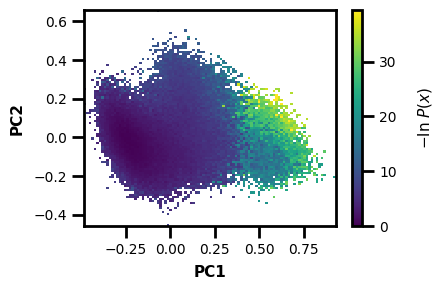

In [9]:
wedap_obj = wedap.H5_Plot(h5="west.h5", data_type="average", Xname=PCs[:,0], Yname=PCs[:,1], xlabel="PC1", ylabel="PC2")
wedap_obj.plot()
plt.show()

In [10]:
# save the resulting figure
wedap_obj.fig.tight_layout()
wedap_obj.fig.savefig("e11-2.png")

We can also make a 3D plot to look at what may relate to the PCs that were calculated:

In [61]:
clust.labels_.reshape(-1,1).shape

(87516, 1)

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

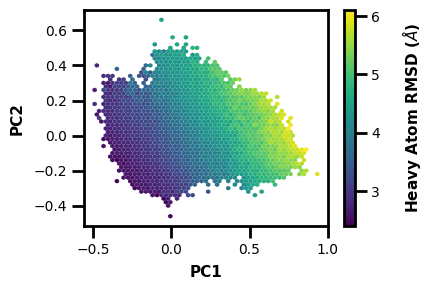

In [6]:
wedap_obj = wedap.H5_Plot(h5="west.h5", plot_mode="hexbin3d", data_type="average", hexbin_grid=50,
                          Xname=PCs[:,0], Yname=PCs[:,1], Zname="pcoord", cbar_label="Heavy Atom RMSD ($\AA$)", xlabel="PC1", ylabel="PC2")
wedap_obj.plot()
plt.show()

What if we want to make a new h5 file with PCs as aux data? Well we can just include some extra args:

Creating new h5 dataset(s):   0%|          | 0/200 [00:00<?, ?it/s]

Data 3D:   0%|          | 0/200 [00:00<?, ?it/s]

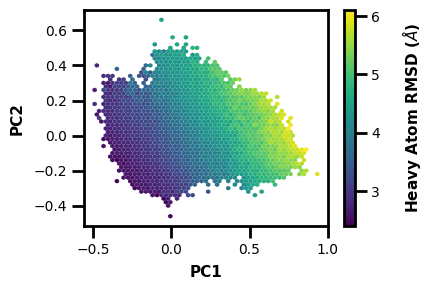

In [17]:
wedap_obj = wedap.H5_Plot(h5="west.h5", plot_mode="hexbin3d", data_type="average", hexbin_grid=50, 
                          H5save_out="west-new.h5", Xsave_name="PC1",
                          Xname=PCs[:,0], Yname=PCs[:,1], Zname="pcoord", cbar_label="Heavy Atom RMSD ($\AA$)", xlabel="PC1", ylabel="PC2")
wedap_obj.plot()

Now we can just plot using PC1 and any of the CLI/API plotting options.

```
$ wedap -W west-new.h5 -pm line -dt average -X PC1 --xlabel PC1
```

Average 1D:   0%|          | 0/200 [00:00<?, ?it/s]

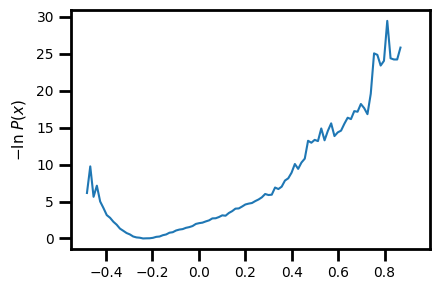

In [18]:
wedap.H5_Plot(h5="west-new.h5", plot_mode="line", data_type="average", Xname="PC1", Xlabel="PC1").plot()

### Example 12: WEKAP plot

We can also plot the rate constant analysis dataset from WESTPA, which is output in a direct.h5 file.

First we can write a Python script to demonstrate the WEDAP post processing function, which allows for highly custom plot formatting and post processing using an additional Python script input. This example plots a horizontal line after the rate constant plot is generated.

The following script is named `ppf.py`:
``` Python
import matplotlib.pyplot as plt

def adjust():
    plt.axhline(100000, linestyle="--", color="k")
```

We can then run `wedap`, `mdap`, or `wekap` with the `--postprocess` arg, calling a Python module:

```
$ wekap -d ANALYSIS/TEST/direct.h5 --postprocess ppf.adjust
```

Alternatively using the API:

In [14]:
import wekap

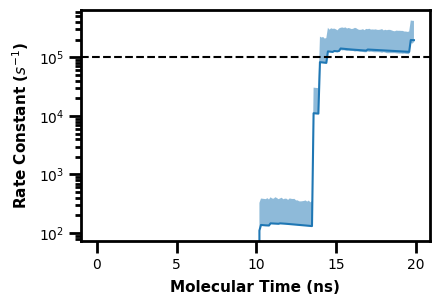

In [16]:
wekap.Kinetics(direct="ANALYSIS/TEST/direct.h5").plot_rate()
plt.axhline(100000, linestyle="--", color="k")
plt.show()

### Example 13: Making a GIF

Here we can observe the time evolution of a 2D pdist using a gif. The avg_plus arg is used to select the range of iterations to average (so for a value of 10, we average n+10 iterations per frame of the gif).

```
$ wedap -h5 west.h5 -x pcoord -y RoG -dt average --pmax 17.5 -pu kcal -li 190 --step-iter 2 --avg-plus 2 --gif-out example.gif --xlim 2 6.5 --ylim 17 20.5 --grid --cmap gnuplot_r --ylabel "Radius of Gyration ($\AA$)" --xlabel "Heavy Atom RMSD ($\AA$)"
```

In [93]:
plot_options = {"h5" : "west.h5",
                "Xname" : "pcoord",
                "Yname" : "RoG",
                "data_type" : "average",
                "p_max" : 17.5,
                "p_units" : "kcal",
                "first_iter" : 1,
                "last_iter" : 190,
                "step_iter" : 2,
                "plot_mode" : "hist",
                "xlabel" : "Heavy Atom RMSD ($\AA$)",
                "ylabel" : "Radius of Gyration ($\AA$)",
                "xlim" : (2, 6.5),
                "ylim" : (17, 20.5),
                "grid" : True,
                "cmap" : "gnuplot_r",
                }
wedap.make_gif(**plot_options, avg_plus=10, gif_out="example.gif")

  0%|          | 0/95 [00:00<?, ?it/s]

The resulting GIF is shown below:

<p align="left">
    <img src="example.gif" alt="example gif" width="400" align="left">
</p>

### Other WEDAP features not shown here:
* multiple h5 inputs (just input a list or multiple h5 files in the command line)
    * these are automatically normalized and plotted as long as the dataset specified exisits in all h5 files input
* Input for `X/Y/Z/Cname` can be a dataset in the west.h5 file (as seen here), but also an numpy array (seen in the ML example) or the name of a file (with a `.dat`, `.txt`, `.pkl`, `.npz`, `.npy` ending).
* trajectory filtering for only successfull events (set `succ_only=True`)
* basis state filtering for trajectories from a specific basis state(s) (`skip_basis`)
* the commands and usage for `MDAP` were not demonstrated here, but examples can be found on the [wedap demo jupyter notebook](https://github.com/darianyang/wedap/blob/main/docs/notebook/wedap_demo.ipynb).
    * besides the WE evolution plot, most other `WEDAP` plots can be made using standard MD data instead of a `west.h5` file from `WESTPA`.